In [46]:
# Import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# Import data from auto-mpg
fileName='auto-mpg.csv'
df = pd.read_csv(fileName, sep=',',na_values='?')  

In [48]:
# General information
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [49]:
# check if null values exist
df.isnull().any()
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [50]:
# Create a copy version before changing value
# Fill missing value in horsepower with mean 
df_edited=df
df_edited['horsepower'].fillna((df_edited['horsepower'].mean()), inplace=True)

In [51]:
# Convert Data type of origin and drop unused column
#df_edited["modelYear"] = df_edited["modelYear"].astype('category')
df_edited["origin"] = df_edited["origin"].astype('category')
df_edited=df_edited.drop(['car name'],axis=1)
df_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    int64   
 7   origin        398 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 22.4 KB


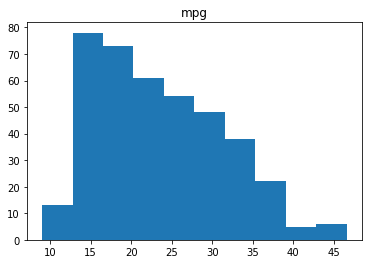

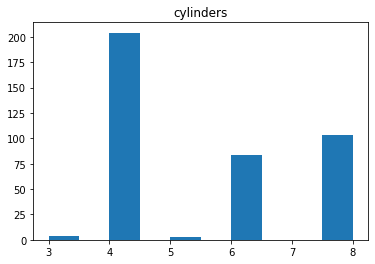

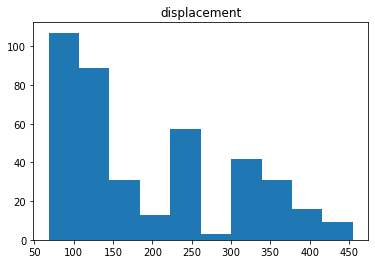

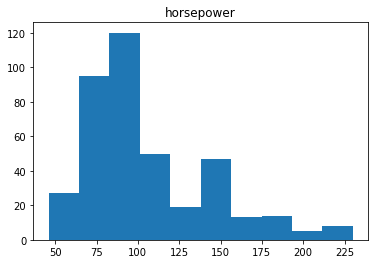

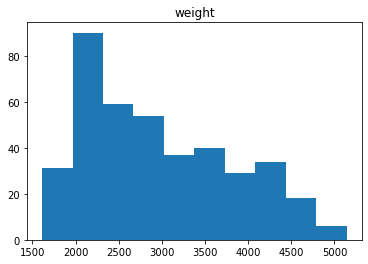

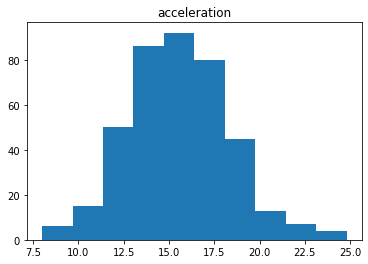

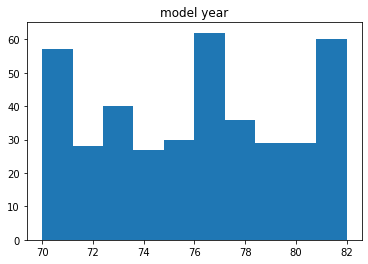

In [52]:
#light explores numeric data
df_num=df_edited.select_dtypes(include='number')

#plot numeric values 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [53]:
# Use pivot table for light exploration
print(pd.pivot_table(df_edited,columns='origin',index='cylinders',values='model year',aggfunc='count'))

origin       1   2   3
cylinders             
3            0   0   4
4           72  63  69
5            0   3   0
6           74   4   6
8          103   0   0


In [54]:
# Count unique values in origin and cylinders
print("Origin: ")
print(df['origin'].value_counts())

print("Cylinders: ")
print(df['cylinders'].value_counts())

Origin: 
1    249
3     79
2     70
Name: origin, dtype: int64
Cylinders: 
4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64


                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.771437 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.838939  0.896017   
displacement -0.804203   0.950721      1.000000    0.893646  0.932824   
horsepower   -0.771437   0.838939      0.893646    1.000000  0.860574   
weight       -0.831741   0.896017      0.932824    0.860574  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.684259 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.411651 -0.306564   

              acceleration  model year  
mpg               0.420289    0.579267  
cylinders        -0.505419   -0.348746  
displacement     -0.543684   -0.370164  
horsepower       -0.684259   -0.411651  
weight           -0.417457   -0.306564  
acceleration      1.000000    0.288137  
model year        0.288137    1.000000  


<AxesSubplot:>

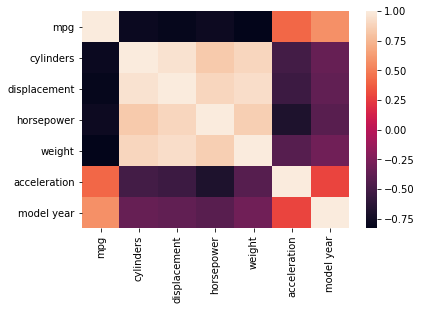

In [55]:
# Find correlations between label and features using heatmap
print(df_edited.corr())
sns.heatmap(df_num.corr())

In [72]:
# Dummy variable encoding for origin
df_edited = pd.get_dummies(df_edited, columns=['origin'],drop_first=True)
df_edited.shape
print(df_edited)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin_2  origin_3  
0            70         0         0  
1            70         0         0  
2            70      

In [57]:
# Import useful libraries for preprocessing data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [58]:

label=df_edited['mpg']
features=df_edited.drop(['mpg'],axis=1)

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.2, random_state=42)

# Check data after spliting
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(318, 8)
(80, 8)
(318,)
(80,)


In [59]:
# Standarize numerical variables of training and testing set before using machine learning algorithm
sc = StandardScaler()
X_train.iloc[:, 0:5] = sc.fit_transform(X_train.iloc[:, 0:5])
X_test.iloc[:, 0:5] = sc.fit_transform(X_test.iloc[:, 0:5])

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [60]:
# apply linear regression on X_train and y_train
lr=LinearRegression()
lr.fit(X_train, y_train)
print("Coefficent: ",lr.coef_)          # Coefficent
print("Intercept : ",lr.intercept_)     # Intercept or Bias


Coefficent:  [-0.27544311  2.01366001 -0.49384575 -5.93612313  0.20236728  0.82739747
  2.93924405  2.65290155]
Intercept :  -40.428098195838594


Text(0, 0.5, 'Y Predictions')

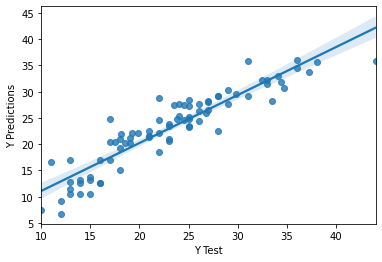

In [61]:
# Predict y_test using X_Test
y_pred = lr.predict(X_test)
# Plot regression line
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y y_pred')

In [81]:
# Evaluate model
from sklearn.metrics import r2_score

print("Model's score on training set: ")
print(lr.score(X_train, y_train))

print("\nModel's score on test set: ")
print(lr.score(X_test, y_test))

print("\nOverall accuracy of model using R squared: ")
print(r2_score(y_pred, y_test))

print("\nMean squared error: ")
print(np.mean((y_pred-y_test)**2))

print("\nRoot mean squared error: ")
print(np.sqrt(np.mean((y_pred-y_test)**2)))

Model's score on training set: 
0.8188288951042786

Model's score on test set: 
0.8472558509594919

Overall accuracy of model using R squared: 
0.8446533697894982

Mean squared error: 
8.21250969752809

Root mean squared error: 
2.8657476681536513
